# Importing libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)

# Reading Data

In [47]:
df = pd.read_csv("/kaggle/input/amazon-product-sales-2025/amazon_sales_2025_INR.csv")

# Cleaning and Preprocessing Data

## 1. Understanding Data

In [7]:
df.shape

(15000, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          15000 non-null  object 
 1   Date              15000 non-null  object 
 2   Customer_ID       15000 non-null  object 
 3   Product_Category  15000 non-null  object 
 4   Product_Name      15000 non-null  object 
 5   Quantity          15000 non-null  int64  
 6   Unit_Price_INR    15000 non-null  float64
 7   Total_Sales_INR   15000 non-null  float64
 8   Payment_Method    15000 non-null  object 
 9   Delivery_Status   15000 non-null  object 
 10  Review_Rating     15000 non-null  int64  
 11  Review_Text       15000 non-null  object 
 12  State             15000 non-null  object 
 13  Country           15000 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.6+ MB


In [14]:
df.head()

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,India
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,India
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,India
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,India
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,India


In [18]:
df.describe()

,Quantity,Unit_Price_INR,Total_Sales_INR,Review_Rating
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,2.984667,24955.313715,74544.120233,3.040133
std,1.422826,14401.316925,59369.654155,1.411048
min,1.000000,202.570000,204.050000,1.000000
25%,2.000000,12512.937500,27087.852500,2.000000
50%,3.000000,24878.755000,57293.570000,3.000000
75%,4.000000,37496.170000,112188.600000,4.000000
max,5.000000,49994.430000,249955.500000,5.000000


## 2. Preparing Data
- ### I intend to do the following:
    - ### 1. Drop irrelevant columns and data
    - ### 2. Identify and remove Null data
    - ### 3. Identify and remove duplicate data
    - ### 4. Renaming columns 
    - ### 5. Feature Understanding

In [48]:
to_drop = df[['Order_ID','Date','Customer_ID','Review_Text']]
to_drop.head()

,Order_ID,Date,Customer_ID,Review_Text
0,ORD100000,2025-01-25,CUST2796,Waste of money
1,ORD100001,2025-08-28,CUST9669,Excellent product!
2,ORD100002,2025-02-27,CUST5808,Fair deal
3,ORD100003,2025-02-24,CUST5889,Highly recommend!
4,ORD100004,2025-06-15,CUST9005,Highly recommend!


### The columns above seem redundant for any data analysis or Machine Learning task.

In [35]:
unique = df['Review_Text'].value_counts()
unique

Review_Text
Satisfied with the product    658
Excellent product!            653
Fantastic quality!            641
Highly recommend!             637
Could be better               632
Poor packaging                626
Worth every rupee!            615
Good quality                  613
Average                       611
Pretty decent                 609
Quality could improve         607
Terrible experience           601
Not satisfied                 600
Not bad                       597
Would buy again               594
Okay product                  593
Product not as expected       592
Very bad product              586
Loved it!                     582
Fair deal                     580
Waste of money                573
Disappointed                  573
Value for money               548
Defective item                543
Never buying again            536
Name: count, dtype: int64

In [36]:
unique.nunique()

24

### On further analyis as the cardinality (no of unique values) is not so high,<br>it might be useful to keep `Review_Text` for any ML classification tasks.

In [49]:
df = df.drop(columns=to_drop)
df.head()

,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,State,Country
0,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Sikkim,India
1,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Telangana,India
2,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Nagaland,India
3,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Assam,India
4,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Odisha,India


In [50]:
df.isna().sum()

Product_Category    0
Product_Name        0
Quantity            0
Unit_Price_INR      0
Total_Sales_INR     0
Payment_Method      0
Delivery_Status     0
Review_Rating       0
State               0
Country             0
dtype: int64

In [51]:
df.loc[df.duplicated()]

,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,State,Country


In [52]:
df.loc[df.duplicated(subset=['Product_Category'])].head()

,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,State,Country
3,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Assam,India
5,Home & Kitchen,Cookware Set,1,12195.41,12195.41,Cash on Delivery,Delivered,5,Maharashtra,India
6,Clothing,Jeans,4,47353.06,189412.24,Cash on Delivery,Delivered,2,Arunachal Pradesh,India
7,Clothing,Sneakers,4,49758.44,199033.76,Cash on Delivery,Delivered,3,Andhra Pradesh,India
8,Clothing,T-Shirt,3,1247.51,3742.53,UPI,Delivered,5,Assam,India


# This is a pretty clean dataset which does not need any further manipulation

## Feature Understanding

In [53]:
df.columns

Index(['Product_Category', 'Product_Name', 'Quantity', 'Unit_Price_INR',
       'Total_Sales_INR', 'Payment_Method', 'Delivery_Status', 'Review_Rating',
       'State', 'Country'],
      dtype='object')

In [58]:
val = df['Product_Category'].value_counts()
val

Product_Category
Electronics       3036
Books             3035
Clothing          3022
Beauty            2997
Home & Kitchen    2910
Name: count, dtype: int64

## Lets plot a bar graph

(2900.0, 3050.0)

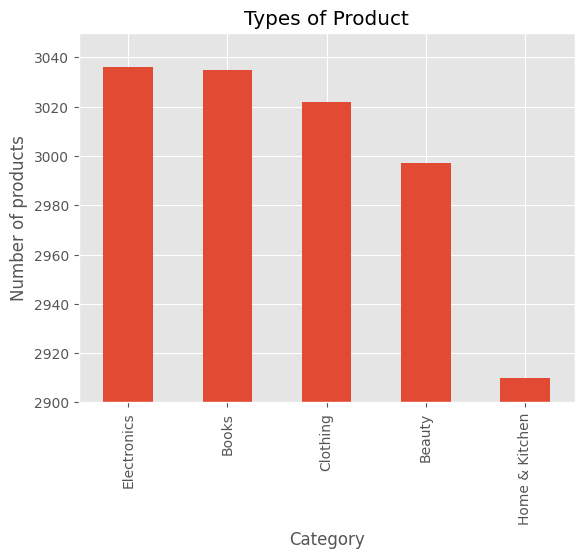

In [70]:
fig = val.plot(kind='bar',title='Types of Product')
fig.set_xlabel("Category")
fig.set_ylabel("Number of products")
plt.ylim(2900, 3050)

## This shows that the leading product category is Electronics and the least is Home & Kitchen.

## Finding out Feature Relationships

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  15000 non-null  object 
 1   Product_Name      15000 non-null  object 
 2   Quantity          15000 non-null  int64  
 3   Unit_Price_INR    15000 non-null  float64
 4   Total_Sales_INR   15000 non-null  float64
 5   Payment_Method    15000 non-null  object 
 6   Delivery_Status   15000 non-null  object 
 7   Review_Rating     15000 non-null  int64  
 8   State             15000 non-null  object 
 9   Country           15000 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.1+ MB


In [75]:
df_corr = df[['Unit_Price_INR','Review_Rating','Quantity']].corr()
df_corr

,Unit_Price_INR,Review_Rating,Quantity
Unit_Price_INR,1.000000,-0.003532,0.002969
Review_Rating,-0.003532,1.000000,-0.005771
Quantity,0.002969,-0.005771,1.000000


<Axes: >

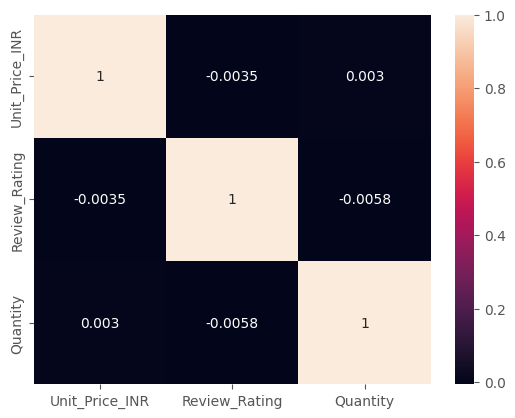

In [76]:
sns.heatmap(df_corr,annot=True)

## The correlation matrix and heatmap shows that there is no major relationship between unit price , review rating and quantity.

# Answering a few questions about this data

## 1. Which two Product Category have had the highest total unit sales?

In [88]:
ques1 = df.groupby("Product_Category")['Quantity'].sum()
ques1.head()

Product_Category
Beauty            9090
Books             8950
Clothing          8924
Electronics       9072
Home & Kitchen    8734
Name: Quantity, dtype: int64

(8700.0, 9100.0)

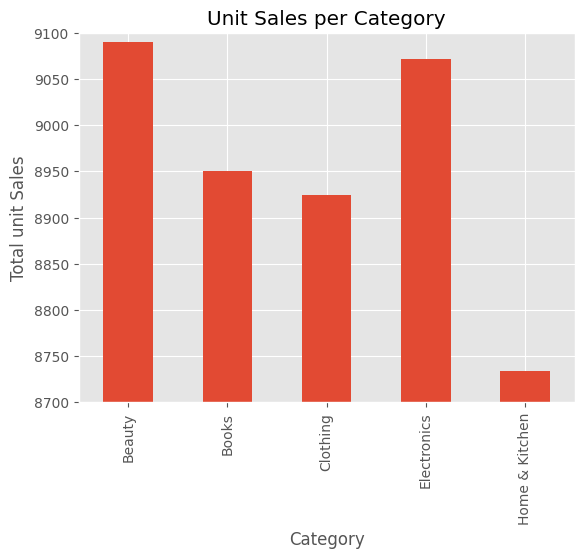

In [95]:
plot = ques1.plot(kind='bar',title='Unit Sales per Category')
plot.set_xlabel('Category')
plot.set_ylabel("Total unit Sales")
plt.ylim(8700,9100)

## This tells us that Beauty and Electronics Category have had the highest total unit sales.

## 2.Which Category has the highest undelivered orders?

In [101]:
df['Delivery_Status'].value_counts()

Delivery_Status
Delivered    5075
Pending      5044
Returned     4881
Name: count, dtype: int64

In [107]:
ques2 = df.query('Delivery_Status =="Pending"').groupby('Product_Category').sum()['Quantity']
ques2.head()

Product_Category
Beauty            2932
Books             2870
Clothing          3119
Electronics       2991
Home & Kitchen    3098
Name: Quantity, dtype: int64

(2800.0, 3200.0)

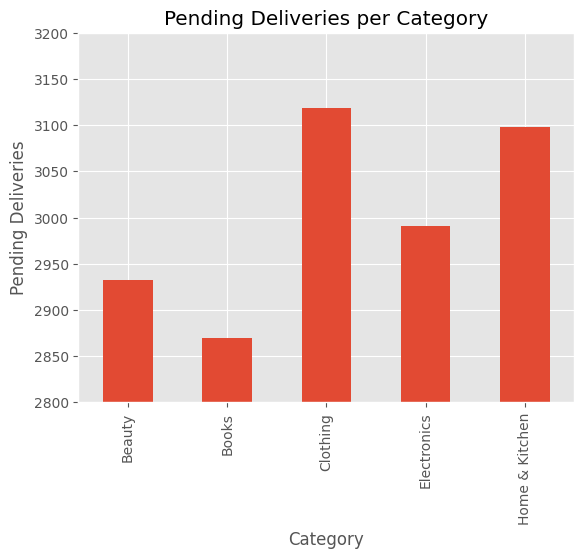

In [113]:
plot = ques2.plot(kind='bar',title='Pending Deliveries per Category')
plot.set_xlabel('Category')
plot.set_ylabel("Pending Deliveries")
plt.ylim(2800,3200)

## This tells us that Clothing followed by Home & Kitchen has the highest number of pending orders

# 3.Which Product Category is the most famous in each state?

In [146]:
ques3 = df.groupby(['State','Product_Category'])['Quantity'].sum().reset_index()
ques3 = ques3.loc[ques3.groupby('State')['Quantity'].idxmax()]

In [143]:
ques3.shape[0]==df['State'].nunique()


True

In [144]:
ques3

,State,Product_Category,Quantity
1,Andhra Pradesh,Books,319
5,Arunachal Pradesh,Beauty,379
13,Assam,Electronics,368
17,Bihar,Clothing,360
22,Chhattisgarh,Clothing,407
25,Goa,Beauty,354
33,Gujarat,Electronics,326
35,Haryana,Beauty,348
44,Himachal Pradesh,Home & Kitchen,353
47,Jharkhand,Clothing,379


# 4. Were Books sold more in Karnataka or Maharashtra?

In [150]:
books_sold= df.query('Product_Category=="Books"  & (State=="Karnataka" | State=="Maharashtra")').groupby(['State'])['Quantity'].sum()
books_sold.head()


State
Karnataka      366
Maharashtra    296
Name: Quantity, dtype: int64

## This tells us that Karnataka purchased more Books.

# 5. Which Method of payment was used the most in Sikkim?

In [153]:
ques5 = df.query('State=="Sikkim"').groupby('Payment_Method')["Quantity"].sum()
ques5.head()

Payment_Method
Cash on Delivery    397
Credit Card         472
Debit Card          467
UPI                 417
Name: Quantity, dtype: int64

## This tells us that Credit Card was used the most in Sikkim followed by Debit Card.

# This ends our exploratory data analysis.